<a href="https://colab.research.google.com/github/katemcg/assignment3/blob/main/assignment3_Part1_3_hs3458_kem2231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><h1 align="center">QMSS5074GR <br> Projects in Advanced Machine Learning <br>Spring 2024 <br> FINAL PROJECT<br>Assignment 3 Part 1 [GROUP Assignment]</h1>

---
<br>

#### **Your Unis** : hs3458, kem2231
#### **Your Full names** : Harini Sundararajan, Kate McGrath
#### **Your AI Model Share Usernames**: harinisund, kem2231
#### **Link to your Public Github repository** : https://github.com/katemcg/assignment3
#### **Team member Contribution Percentages** : Fill here

## Stanford Sentiment Treebank - Movie Review Classification Competition

## **Instructions: [Total 15 Points for this part]**
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using Sklearn TFIDF Vectorizer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit model to competition
5. Repeat submission process to improve place on leaderboard



## 1. Get data in and set up X_train, X_test, y_train objects

In [ ]:
#install aimodelshare library
! pip install aimodelshare

In [ ]:
# Get competition data
from aimodelshare import download_data
download_data('public.ecr.aws/y2e2a1d6/sst2_competition_data-repository:latest')

In [ ]:
# Set up X_train, X_test, and y_train_labels objects
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

X_train=pd.read_csv("sst2_competition_data/X_train.csv")
X_test=pd.read_csv("sst2_competition_data/X_test.csv")
y_train_labels=pd.read_csv("sst2_competition_data/y_train_labels.csv")

X_train.head()

In [4]:
def to_series(df):
  ## Complete this function to convert to series if there is only one column, else keep as dataframe. [1 Pts]
  if len(df.columns) == 1:
    return(df.squeeze())

In [5]:
X_train=to_series(X_train)
X_test=to_series(X_test)
y_train_labels=to_series(y_train_labels)

##2.   Preprocess data and Analyze


In [ ]:
import re
import string

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [20]:
# Build a Document-Term Matrix (DTM) out of words in the training set
# Remove stop words that occur too frequently to be useful, and
# Use Term Frequency - Inverse Document Frequency (TF-IDF) formula to weight by how common words are generally

# Code here [1 pts]

# moved dtm and tf-idf to be after preprocessor

# code from NLP tutorial, cleaning text def
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# code from NLP tutorial, remove stop words def
stop_words = stopwords.words('english') + ['u', 'im', 'c']

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

In [21]:
# Write function to transform data with preprocessor
# New samples will be put into a DTM based on vocabularly from training set

stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

# code here [1 pts]
def preprocessor(text):
    # Clean puntuation, urls, and so on
    text = text.apply(clean_text)
    # Remove stopwords
    text = text.apply(remove_stopwords)
    # Stemm all the words in the sentence
    text = text.apply(stemm_text)

    return text

In [48]:
# dtm and tf-idf on preprocessed data

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(preprocessor(X_train))

# creating document-term matrix
X_train_dtm = vect.transform(preprocessor(X_train))

# tf-idf
tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(X_train_dtm)
X_train_tfidf = tfidf_transformer.transform(X_train_dtm)

In [24]:
print(X_train.head())
print(preprocessor(X_train).head())

0    The Rock is destined to be the 21st Century 's...
1    The gorgeously elaborate continuation of `` Th...
2    Singer/composer Bryan Adams contributes a slew...
3                 Yet the act is still charming here .
4    Whether or not you 're enlightened by any of D...
Name: text, dtype: object
0    rock destin  centuri new  conan  go make splas...
1    gorgeous elabor continu  lord ring  trilog hug...
2    singercompos bryan adam contribut slew song  p...
3                                 yet act still charm 
4    whether enlighten derrida lectur    self   der...
Name: text, dtype: object


Perform EDA and Visualizations (class balance, review lengths, word frequency per class, Wordcloud, etc)

In [25]:
# EDA and Viz code [3 Pts]

import matplotlib.pyplot as plt

# class balance about even -- 52.17% positive, 47.83% negative
print(100 * y_train_labels.value_counts() / sum(y_train_labels.value_counts()))

label
Positive    52.16763
Negative    47.83237
Name: count, dtype: float64


In [26]:
# reviewing word length by class
  # they have a very similar distribution, and so we can assume review length
  # does not impact class
import tensorflow as tf

data = pd.concat({'x': X_train, 'x_clean': preprocessor(X_train), 'y': y_train_labels},
                 axis = 1)

data['x_len'] = data['x'].apply(lambda x: len(x.split(' ')))

pos_df = data[data['y'] == 'Positive']['x_len'].value_counts().sort_index()
neg_df = data[data['y'] == 'Negative']['x_len'].value_counts().sort_index()

from plotly import graph_objs as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=pos_df.index,
    y=pos_df.values,
    name='Positive',
    fill='tozeroy',
    marker_color="green",
))
fig.add_trace(go.Scatter(
    x=neg_df.index,
    y=neg_df.values,
    name='Negative',
    fill='tozeroy',
    marker_color="red",
))
fig.update_layout(
    title='Review length by category'
)
fig.show()

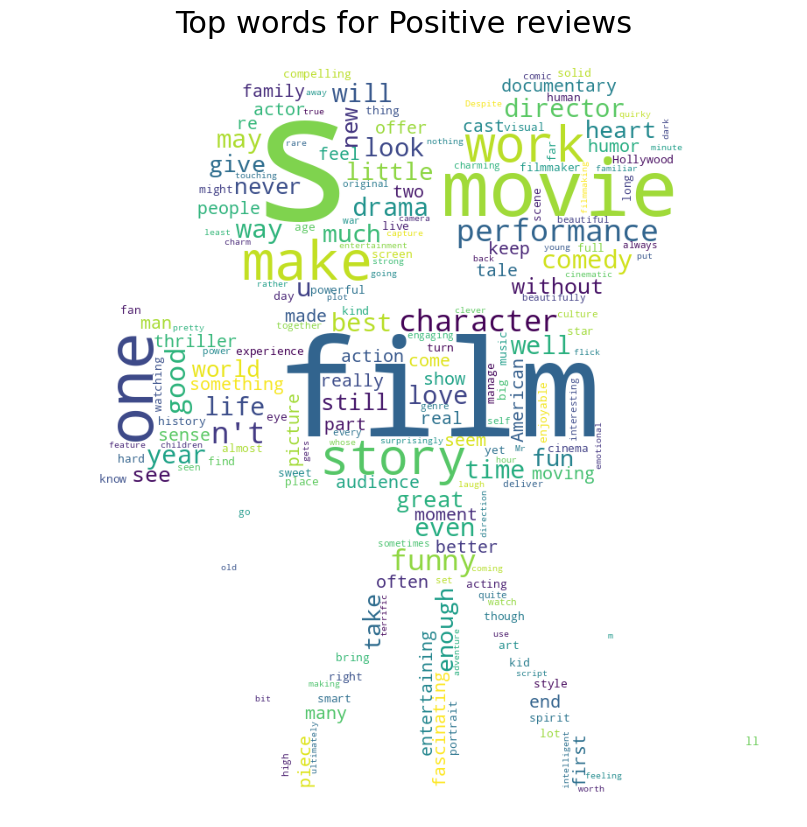

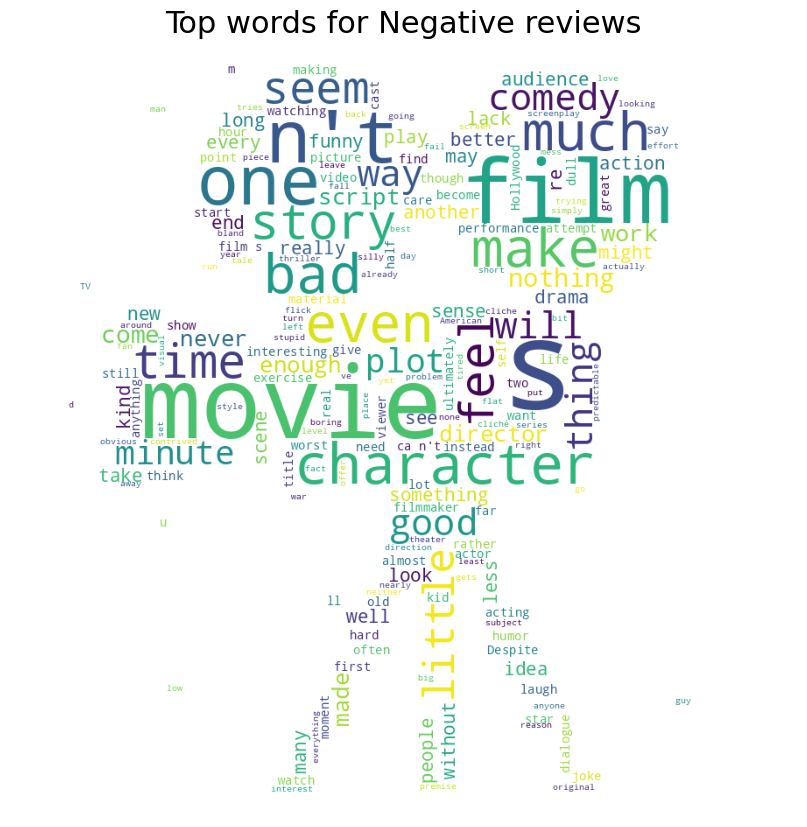

In [27]:
# word clouds for both classes

from PIL import Image
import requests
from io import BytesIO
from wordcloud import WordCloud

# getting mask
url = "https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fgetdrawings.com%2Fimg%2Ffilm-silhouette-19.jpg&f=1&nofb=1&ipt=ee05962bf1307611595285aee066d434644995ab465594444e2f1c03932f2557&ipo=images"

movie_mask = np.array(Image.open(requests.get(url, stream=True).raw))

# positive
wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=movie_mask,
)
wc.generate(' '.join(text for text in data.loc[data['y'] == 'Positive', 'x']))
plt.figure(figsize=(18,10))
plt.title('Top words for Positive reviews',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

# negative
wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=movie_mask,
)
wc.generate(' '.join(text for text in data.loc[data['y'] == 'Negative', 'x']))
plt.figure(figsize=(18,10))
plt.title('Top words for Negative reviews',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

If you think lemmatization, stemming and other text preprocessing should be performed, code here. You can also go back and include it in the preprocessing function if you want.

You are also free to include any extra features that you extract from the text to aid in modeling (Optional)

In [28]:
# additional preprocessing [2 Pts]

# added stemming directly to preprocessing function

##3. Fit model on preprocessed data and save preprocessor function and model


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Code Random Forest model [1 Pts]
model = RandomForestClassifier(n_estimators=200, max_depth=4)
model.fit(X_train_dtm, y_train_labels) # Fitting to the training set.

print("forest train set score: {:.3f}".format(model.score(X_train_dtm, y_train_labels)))

forest train set score: 0.561


#### Save preprocessor function to local "preprocessor.zip" file

In [33]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

Your preprocessor is now saved to 'preprocessor.zip'


#### Save model to local ".onnx" file

In [74]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count = X_train_dtm.shape[1] # Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))] # Get correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                           initial_types=initial_type,
                           transfer_learning=False,
                           deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## 4. Generate predictions from X_test data and submit model to competition


In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

apiurl="https://rlxjxnoql9.execute-api.us-east-1.amazonaws.com/prod/m" #This is the unique rest api that powers this Movie Review Playground

set_credentials(apiurl=apiurl)

In [37]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 1:

#-- Generate predicted values (a list of predicted labels "positive" or "negative") (Model 1)
X_test_dtm = vect.transform(preprocessor(X_test))

prediction_labels = model.predict(X_test_dtm)

model_filepath1 = "model.onnx"
preprocessor_filepath="preprocessor.zip"

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = "model.onnx",
                                 preprocessor="preprocessor.zip",
                                 prediction_submission=prediction_labels)

## 5. Repeat submission process to improve place on leaderboard


In [78]:
# Train and submit model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

# Re fit a better RF model [1 Pts]

# increased n_estimators from 200 to 500, max_depth from 4 to 8
model2 = RandomForestClassifier(n_estimators=500, max_depth=8)
model2.fit(X_train_dtm, y_train_labels) # Fitting to the training set.

print("forest train set score: {:.3f}".format(model2.score(X_train_dtm, y_train_labels)))

forest train set score: 0.641


In [79]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# complete as before

onnx_model2 = model_to_onnx(model2, framework='sklearn',
                            initial_types=initial_type,
                            transfer_learning=False,
                            deep_learning=False)

with open("model2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 2:

#-- Generate predicted values (a list of predicted labels "positive" or "negative") (Model 2)
prediction_labels2 = model2.predict(X_test_dtm)

model_filepath2 = "model2.onnx"
preprocessor_filepath = "preprocessor.zip"

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model = "model2.onnx",
                           preprocessor="preprocessor.zip",
                           prediction_submission=prediction_labels2)

In [81]:
# Compare two or more models

# not sure why it shows the same max_depth and n_estimators for both, as shown below
data = mycompetition.compare_models([533, 534], verbose=1)
mycompetition.stylize_compare(data)

,param_name,default_value,model_version_533,model_version_534
0,bootstrap,True,True,True
1,ccp_alpha,0.000000,0.000000,0.000000
2,class_weight,None,None,None
3,criterion,gini,gini,gini
4,max_depth,None,4,4
5,max_features,sqrt,sqrt,sqrt
6,max_leaf_nodes,None,None,None
7,max_samples,None,None,None
8,min_impurity_decrease,0.000000,0.000000,0.000000
9,min_samples_leaf,1,1,1


In [82]:
print("Number of trees in model1, 530 (n_estimators):", model.n_estimators)
print("Number of trees in model2, 532 (n_estimators):", model2.n_estimators)

print("Max depth of model1, 530 (n_estimators):", model.max_depth)
print("Max depth of model2, 532 (n_estimators):", model2.max_depth)

Number of trees in model1, 530 (n_estimators): 200
Number of trees in model2, 532 (n_estimators): 500
Max depth of model1, 530 (n_estimators): 4
Max depth of model2, 532 (n_estimators): 8


In [84]:
# Submit a third model using GridSearchCV

from sklearn.model_selection import GridSearchCV
import numpy as np

# Do grid search over atleast 2 hyperparams of RF and get your best model [1 Pts]

# using grid search cv to choose magnitude of...
    # number of trees, max depth, max features, and criterion
    # commented out options because it takes so long, tested one by one
param_grid = {
    'n_estimators': np.arange(200, 500, 100),
    'max_depth' : np.arange(2, 10, 2),
    'max_features': ['sqrt', 'log2'],
    'criterion' : ['gini', 'entropy']
}

# fitting the model and choosing best params
gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10) ## Define a Random Forest Model here, fit it, and score it
gridmodel.fit(X_train_dtm, y_train_labels)

# extract and print best score and parameters
# the chosen params are n_est=300, max_depth=8, max_features=sqrt, criterion=gini
print("best forest params: {}".format(gridmodel.best_params_))
print("forest train set score: {:.3f}".format(gridmodel.score(X_train_dtm, y_train_labels)))
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))

best forest params: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}
forest train set score: 0.640
best mean cross-validation score: 0.607


In [85]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# complete

onnx_model = model_to_onnx(gridmodel, framework='sklearn',
                           initial_types=initial_type,
                           transfer_learning=False,
                           deep_learning=False)

with open("gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 3:

#-- Generate predicted values (a list of predicted labels "real" or "fake")
prediction_labels = gridmodel.predict(X_test_dtm)

# Submit Model 3 to Competition Leaderboard
mycompetition.submit_model(model = "gridmodel.onnx",
                           preprocessor="preprocessor.zip",
                           prediction_submission=prediction_labels)

In [91]:
# Compare two or more models
data=mycompetition.compare_models([530, 532, 535], verbose=1)
mycompetition.stylize_compare(data)

,param_name,default_value,model_version_530,model_version_532,model_version_535
0,bootstrap,True,True,True,True
1,ccp_alpha,0.000000,0.000000,0.000000,0.000000
2,class_weight,None,None,None,None
3,criterion,gini,gini,gini,gini
4,max_depth,None,4,4,8
5,max_features,sqrt,sqrt,sqrt,sqrt
6,max_leaf_nodes,None,None,None,None
7,max_samples,None,None,None,None
8,min_impurity_decrease,0.000000,0.000000,0.000000,0.000000
9,min_samples_leaf,1,1,1,1


In [158]:
# Here are several classic ML architectures you can choose from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from aimodelshare.aimsonnx import model_to_onnx

## Experiment with atleast 3 different models from above imports. [2 Pts]

## KNeighborsClassifier
# using grid search cv to find best n
param_grid = {'n_neighbors': np.arange(1, 15, 2)}

# fitting the model
knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
knn.fit(X_train_dtm, y_train_labels)

# 9 is the best value for n, according to grid search
print("knn best mean cross-validation score: {:.3f}".format(knn.best_score_))
print("best n parameters: {}".format(knn.best_params_))

## SVC
# using grid search cv to choose magnitude of C, gamma
param_grid = {
    'kernel': ['linear'],   # ['rbf', 'linear']
    'C': [5],               # [1, 5, 10, 50]
    'gamma': [0.005]        # [0.0001, 0.0005, 0.001, 0.005]
}

# fitting the model and choosing best params
svm = GridSearchCV(SVC(), param_grid=param_grid, cv=10)

# defining the best model
svm.fit(X_train_dtm, y_train_labels)

# the chosen params are C=55, gamma=0.005, and kernel=linear
print("best svm params: {}".format(svm.best_params_))
print("svm train set score: {:.3f}".format(svm.score(X_train_dtm, y_train_labels)))

## BaggingClassifier
# using grid search cv to choose magnitude of base_estimator__max_depth, max_samples
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

# fitting the model and choosing best params
bag = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, max_features = 0.5),
                   param_grid=param_grid, cv=10)

# defining the best model
bag.fit(X_train_dtm, y_train_labels)

# the chosen params are C=50, gamma=0.005, and kernel=rbf
print("best bag params: {}".format(bag.best_params_))
print("bag train set score: {:.3f}".format(bag.score(X_train_dtm, y_train_labels)))

knn best mean cross-validation score: 0.596
best n parameters: {'n_neighbors': 9}
best svm params: {'C': 5, 'gamma': 0.005, 'kernel': 'linear'}
svm train set score: 0.994
best bag params: {'base_estimator__max_depth': 5, 'max_samples': 0.05}
bag train set score: 0.626


Tabularize your results and compare them here:

In [144]:
# code [1 Pts]

# List of saved models
models = [model, model2, gridmodel, knn, svm, bag]

test_metrics = []

# Evaluate the models on the test data to obtain performance metrics
for mod in models:
  if isinstance(mod, GridSearchCV):
    val_score = mod.best_score_
  else:
    val_score = np.nan

  test_metrics.append({'Train Score': mod.score(X_train_dtm, y_train_labels),
                       'Cross-Validation Score': val_score})

metrics_df = pd.DataFrame({
    'Model': ['RF Model 1','RF Model 2','RF Model 3','KNN Model','SVM Model', 'Bagging Model'],
    'Train Score': [metrics['Train Score'] for metrics in test_metrics],
    'Cross-Validation Score': [metrics['Cross-Validation Score'] for metrics in test_metrics]
    })

print(metrics_df)

           Model  Train Score  Cross-Validation Score
0     RF Model 1     0.560838                     NaN
1     RF Model 2     0.641185                     NaN
2     RF Model 3     0.640173                0.607081
3      KNN Model     0.738150                0.596387
4      SVM Model     0.994075                     NaN
5  Bagging Model     0.621243                0.613584


Discuss which models performed better and why

In [ ]:
# Discussion [1 Pts]

# the SVC model performed the best with a large lead at a training score of 0.99.
  # the support vector method is knonw to work well with smaller data sets, and is
  # a very flexible model. this flexibility was likely important in being able to
  # capture much more variance in the data than any of the other models.
# the knn model was the next best, and can make sense for NLP. this is because
  # certain groupings in the words might be able to bettwe understand whether a
  # review will be positive or negative. this scored 0.73, although the cross
  # validation score was much lower at 0.60.
# the badding classifier model and random forest classifiers all performed worse.